<a href="https://www.kaggle.com/code/ozgurfirat05/breast-cancer-ml-classification-97-f-rat-meydan?scriptVersionId=121214513" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [4]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
df=df.drop("id",axis=1)

In [6]:
bm=df['diagnosis'].value_counts()

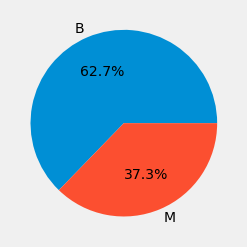

In [7]:
plt.style.use("fivethirtyeight")
plt.pie(bm.values,labels=bm.index,autopct="%1.1f%%")
plt.show()

In [8]:
df['diagnosis']=np.where(df['diagnosis']=="M",1,0)

In [9]:
y=df[['diagnosis']]
x=df.drop("diagnosis",axis=1)

In [10]:
minmax=MinMaxScaler()
x=minmax.fit_transform(x)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=20)

In [12]:
tree=DecisionTreeClassifier(max_depth=3)
model=tree.fit(x_train,y_train)
model.score(x_test,y_test)

0.9649122807017544

In [13]:
orman=RandomForestClassifier(n_estimators=100)
omodel=orman.fit(x_train,y_train)
omodel.score(x_test,y_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9649122807017544